In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

#### Задание 1. 
Загрузите файл HR.csv в pandas dataframe

In [4]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Задание 2. 
Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
# для нахождения среднего, мин/макс, среднеквадр. отклонения используем метод describe()
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [34]:
# находим медиану
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [26]:
# находим моду
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


#### Задача 3. 
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.

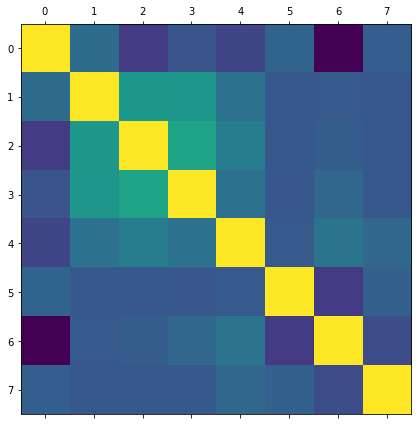

In [39]:
plt.matshow(df.corr())
plt.
plt.show()

In [53]:
df.corr()[(df.corr()<1) & (df.corr()>0)].max()

satisfaction_level       0.105021
last_evaluation          0.349333
number_project           0.417211
average_montly_hours     0.417211
time_spend_company       0.196786
Work_accident            0.058697
left                     0.144822
promotion_last_5years    0.067433
dtype: float64

видно, что **наиболее скоррелированны** между собой **number_project** и **average_montly_hours**

In [55]:
df.corr()[(df.corr()<0)].min()

satisfaction_level      -0.388375
last_evaluation         -0.008684
number_project          -0.142970
average_montly_hours    -0.020048
time_spend_company      -0.100866
Work_accident           -0.154622
left                    -0.388375
promotion_last_5years   -0.061788
dtype: float64

видно, что **наименее скоррелированны** между собой **satisfaction_level** и **left**

#### Задача 4. 
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [57]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

#### Задача 5. 
Показать распределение сотрудников по зарплатам.

In [60]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [59]:
# тоже самое, но в процентах
df.salary.value_counts(normalize=True)*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

#### Задача 6. 
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [67]:
df.groupby(['department','salary'])['salary'].count()

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: salary, dtype: int64

In [79]:
# или так
df.groupby(['department'])['salary'].value_counts(sort=False)

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: salary, dtype: int64

In [81]:
# тоже самое, но в процентах, в порядке убывания
df.groupby(['department'])['salary'].value_counts(normalize=True)*100

department   salary
IT           low       49.633252
             medium    43.602282
             high       6.764466
RandD        medium    47.268107
             low       46.251588
             high       6.480305
accounting   low       46.675359
             medium    43.676662
             high       9.647979
hr           medium    48.579161
             low       45.331529
             high       6.089310
management   high      35.714286
             medium    35.714286
             low       28.571429
marketing    low       46.853147
             medium    43.822844
             high       9.324009
product_mng  low       50.000000
             medium    42.461197
             high       7.538803
sales        low       50.700483
             medium    42.801932
             high       6.497585
support      low       51.413190
             medium    42.261104
             high       6.325707
technical    low       50.441176
             medium    42.169118
             high      

#### Задача 7. 
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [70]:
df[df.salary != 'medium'].groupby('salary')['average_montly_hours'].sum()

salary
high     247236
low     1470491
Name: average_montly_hours, dtype: int64

как видим гипотеза не подтвердилась.

#### Задача 8. 
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [61]:
# Доля сотрудников с повышением за последние 5 лет
df.groupby('left')['promotion_last_5years'].value_counts(normalize=True)*100

left  promotion_last_5years
0     0                        97.374869
      1                         2.625131
1     0                        99.467936
      1                         0.532064
Name: promotion_last_5years, dtype: float64

**вывод:** среди уволившихся сотрудников повышение получили 0,5% людей, среди неуволившихся 2,6%. Можно предположить, что повышение сотрудника мотивирует его работать дальше в компании, хотя на какую-то часть это не повлияло.

In [174]:
# средний уровень удовлетворенности среди уволившихся сотрудников
df.groupby('left')['satisfaction_level'].mean()[1].round(2)

0.44

In [173]:
# средний уровень удовлетворенности среди неуволившихся сотрудников
df.groupby('left')['satisfaction_level'].mean()[0].round(2)

0.67

**вывод:** уволившиеся сотрудники были меньше удовлетворены работой, чем неуволившиеся. Возможно неудовлетворенность работой повлияла на их увольнение.

In [189]:
# количество проектов у уволившихся сотрудников
df.groupby('left')['number_project'].mean()[1].round(2)

3.86

In [190]:
# количество проектов у неуволившихся сотрудников
df.groupby('left')['number_project'].mean()[0].round(2)

3.79

**вывод:** каждый уволившийся сотрудник в среднем вел больше проектов, чем каждый неуволившийся. Возможно их увольнение связано с этим фактом.

#### Задача 9. 
Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [48]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df.iloc[:,:-2], test_size=0.2)

In [49]:
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
lda = LinearDiscriminantAnalysis()

In [52]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test, lda.predict(data_test))

0.759

как видим, точность модели составляет 75%

In [57]:
lda.coef_

array([[-4.63059891e+00,  5.61842438e-01, -2.41763943e-01,
         4.22179794e-03,  2.24972633e-01, -1.11332890e+00,
        -1.14804268e+00]])